# Analysis of Final Sessions Data
Hamish & Elliot | Jan 2022 | Simon Fraser university

The goal of this notebook is to perform analysis on our final round of eperimental data with a faster time constant. While producing time series, phase portrait, power spectrum, and bifurcation plots, we want to observe the behaviour of cascading bifurcations and chaos in our system. Ultimately we will compare these finding with previous experimental trials to see if the effect of changing capacitance is significant, as well as our numerical simulation. Using dimensionless constants like the first and second Feigenbaum constants: $\delta$ & $\alpha$ - will be investigated to see how consistent they are across all of our data and simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import scipy.interpolate as interpolate
from glob import glob
from tools import unique_maxs, local_max, generate_Rv_Plots
from datetime import datetime as dt
import pytz # for seting datetime timezone

# Bifurcation Plot

In [2]:
filenames = glob("/work/Data_experimental/Fast_sweep/*")
bifurcation = []
Rv_arr = []
data = {}
N_periods = []
N = 100
#fig = plt.figure(figsize = (16,8))
for filename in filenames:
    
    t, negative_x_prime, x = np.genfromtxt(filename, skip_header = 12, delimiter = ',', unpack = True)
    x=x*1000
    t = t - np.min(t)
    x_prime = -negative_x_prime*1000

    Rv = float(filename.split('/')[-1][3:-4])
    if Rv == 70.25:
        N = 1000
        
    Rv_arr.append(Rv)
    data[filename.split('/')[-1][:-4]] = (t,x)
    maxs = unique_maxs(x, N = N, error_tol = 1e-2)
    N_periods.append(len(maxs))
    bifurcation.append(maxs)

In [3]:
Rv_arr = np.array(Rv_arr)
N_periods = np.array(N_periods)

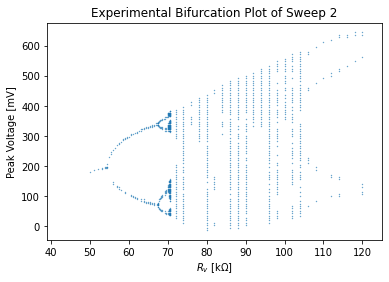

In [4]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)),bif,".",color = "C0", markersize = 0.7,alpha = 0.9)


tz = pytz.timezone('US/Pacific')
dateString = str(dt.now(tz).date())
plt.xlabel(r"$R_v$ [k$\Omega$]")
plt.ylabel(r"Peak Voltage [mV]")
plt.title("Experimental Bifurcation Plot of Sweep 2")
plt.xlim(39,125)
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-ExperiBifurcationFast.png",dpi = 600)
plt.show()

# Compare Experimental Bifurcation Plots &amp; Simulation

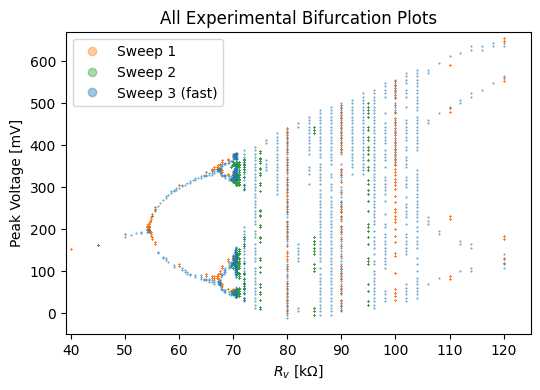

In [5]:
# Code here for
# 1. Comparing three sets of experimental plots
# 2. Same again but with simulation bifurcation as wel

fig = plt.figure(dpi = 100)

# Grab Older Sweep Data
filenames = glob("/work/Data_experimental/Coarse_sweep*/*")
bifurcation1 = []
Rv_arr1 = []
day_arr1 = []
data = {}

for filename in filenames:
    
    #dayVal = filename[36]
    #print(dayVal)
    if filename.split('/')[-2][-1] == '2':
        day_arr1.append(2)
    else:
        day_arr1.append(1) # nice

    t, negative_x_prime, x = np.genfromtxt(filename, skip_header = 12, delimiter = ',', unpack = True)
    x *= 1000
    t = t - np.min(t)
    x_prime = -negative_x_prime*1000

    Rv = float(filename.split('/')[-1][3:-4])
    Rv_arr1.append(Rv)
    data[filename.split('/')[-1][:-4]] = (t,x)
    maxs = unique_maxs(x, N = 50, error_tol = 1e-2)
    bifurcation1.append(maxs*100)

sweep1_Rvs = []
sweep1_bifs = []
sweep2_Rvs = []
sweep2_bifs = []

for idx, bifu in enumerate(bifurcation1):
    if day_arr1[idx] == 1:
        sweep1_Rvs.append(Rv_arr1[idx])
        sweep1_bifs.append(bifu)
    elif day_arr1[idx] == 2:
        sweep2_Rvs.append(Rv_arr1[idx])
        sweep2_bifs.append(np.array(bifu))
    else:
        pass

for Rv, bif, day in zip(Rv_arr1, bifurcation1,day_arr1):
    if day == 2:
        #bif = k*np.array(bif) 
        colourVal = "C2"
    else:
        colourVal = "C1"
    plt.plot(Rv*np.ones(len(bif)), bif, 'o',color = colourVal, markersize = 0.2,alpha = 0.05)
plt.plot(-100,-100,"C1o",label = "Sweep 1",alpha = 0.4)
plt.plot(-100,-100,"C2o",label = "Sweep 2",alpha = 0.4)
plt.plot(-100,-100,"C0o",label = "Sweep 3 (fast)",alpha = 0.4)


# Plot new data
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif,'o',color = "C0", markersize = 0.5,alpha = 0.7)

# Format and save plot
tz = pytz.timezone('US/Pacific')
dateString = str(dt.now(tz).date())
plt.xlabel(r"$R_v$ [k$\Omega$]")
plt.ylabel(r"Peak Voltage [mV]")
plt.title("All Experimental Bifurcation Plots")
plt.legend()
plt.xlim(39,125)
plt.ylim(-50,670)
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-allExperimentalBifurcations.png",dpi = 600)
plt.show()
plt.close()

# Making plot of time series

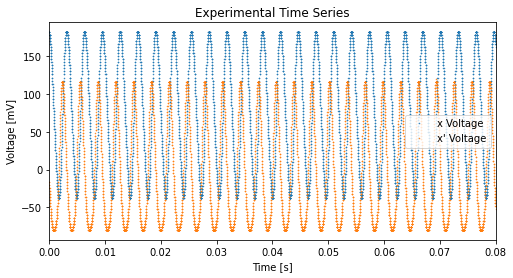

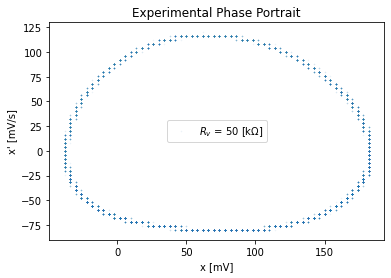

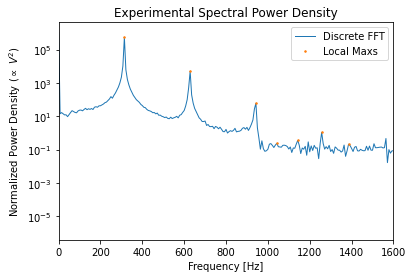

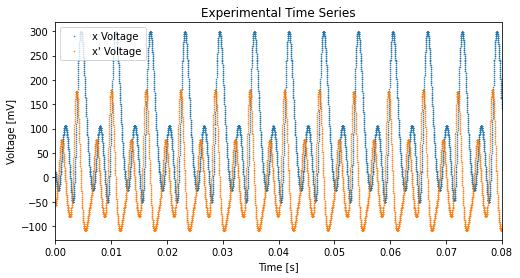

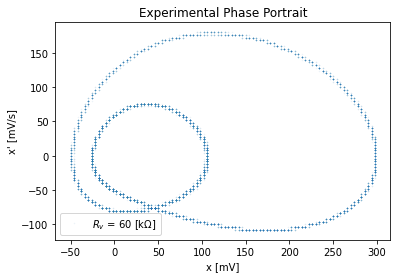

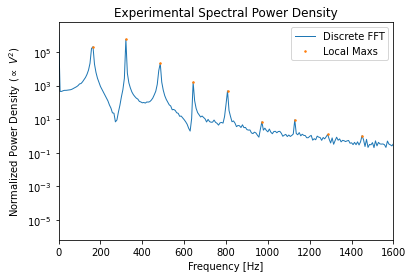

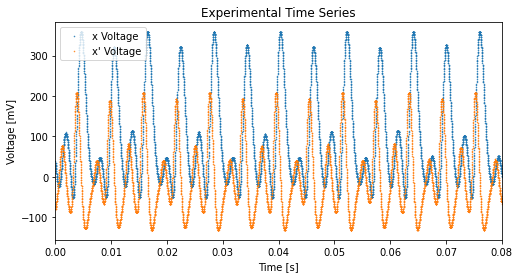

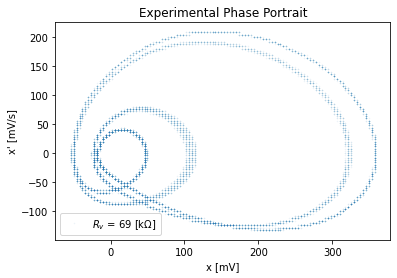

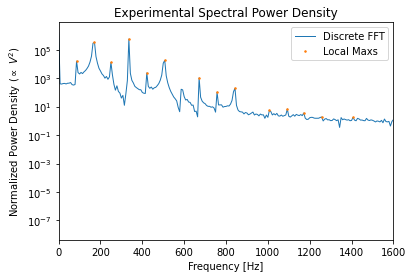

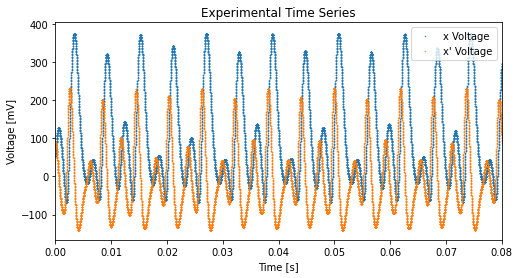

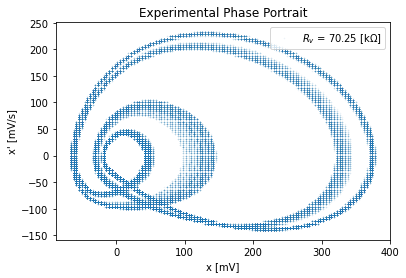

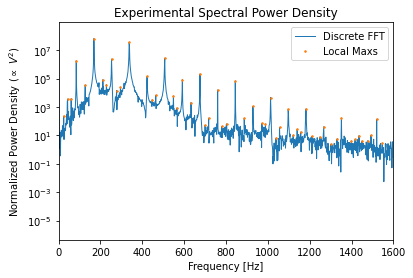

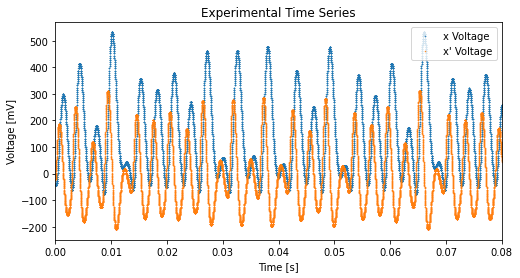

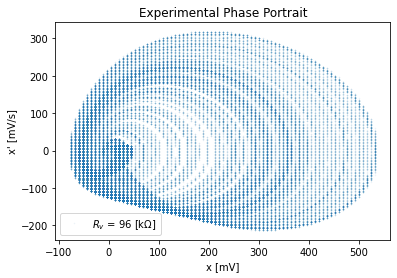

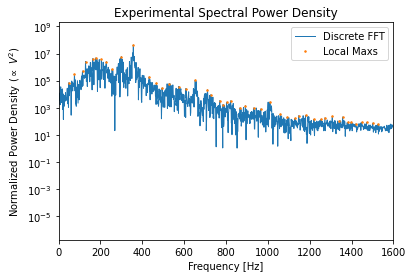

In [6]:
directory = "/work/Data_experimental/Fast_sweep/"
filenames = [directory + "Rv_50.txt", directory + "Rv_60.txt",
            directory + "Rv_69.txt", directory + "Rv_70.25.txt", directory + "Rv_96.txt"]


#commented to clear the output
for filename in filenames:
    axs = generate_Rv_Plots(filename,diffPeakThresh = 15,specN = 10, peakN = 500,printDat = False,mainCol = "C0",secondCol="C1")
    plot_names = ['time_series', 'phase', 'spectrum']
    for plot_name, ax in zip(plot_names,axs):
        directory = '/work/Notes/Experimental/fast_figures/' 
        new_file = filename.split('/')[-1][:-4]
        ax.savefig("/work/Notes/Final_Summary/"+dateString+"-Experimental-"+new_file + plot_name+".png",dpi = 600)

# Feigenbaum constant

[50.  53.  57.5 67.5 70.3 70.4]
[0.6666666666666666, 0.45, 3.571428571428575, 27.999999999997584]


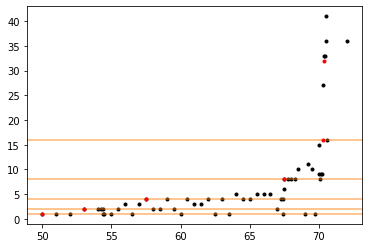

In [7]:
shortened_Rv_arr = Rv_arr[Rv_arr<74]
shortened_Period_arr = N_periods[Rv_arr<74]
plt.plot(shortened_Rv_arr,shortened_Period_arr,"k.")
n = 0
phaseSpaceBifurcations = np.array([])
idx = np.argsort(shortened_Rv_arr)


RvBif_array = []
nPeriod_array = []

for _ in idx:
    if shortened_Period_arr[_] >= 2**n:
        RvBif_array.append(shortened_Rv_arr[_])
        nPeriod_array.append(2**n)
        n+=1
    else:
        pass
RvBif_array=np.array(RvBif_array)
nPeriod_array=np.array(nPeriod_array)

plt.axhline(1,color = "C1",alpha = 0.6)
plt.axhline(2,color = "C1",alpha = 0.6)
plt.axhline(4,color = "C1",alpha = 0.6)
plt.axhline(8,color = "C1",alpha = 0.6)
plt.axhline(16,color = "C1",alpha = 0.6)
print(RvBif_array)
plt.plot(RvBif_array,nPeriod_array,"r.")
# quickly numerically extracting # peaks to see how well it agrees, dont think we need it but wanted to check

del_Rv = np.diff(RvBif_array)
feib_array = []
for _ in range(len(del_Rv)-1):
    feib_array.append(del_Rv[_]/del_Rv[_+1])

print(feib_array)

# Can delete I think

[4.17049808 4.7027027 ]


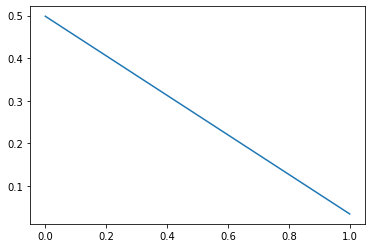

In [8]:
a = [54.425, 67.475, 70.25] #70.6?
b=a

feig = []
faig_error = []
for i in range(len(a) - 1):
    if i == 0:
        feig.append(a[i]/abs(a[i] - a[i+1]))

    else:
        feig.append((a[i] - a[i-1])/abs(a[i] - a[i+1]))

feig = np.array(feig)
print(feig)
dif_feig = abs(feig - 4.669)

plt.plot(dif_feig)
plt.show()

[4.17049808 4.7027027 ]
[0.13851994 0.84000422]


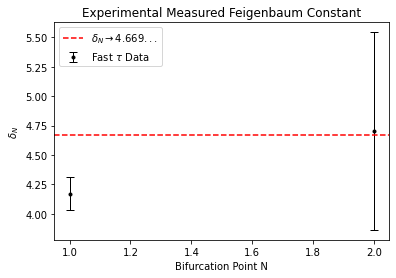

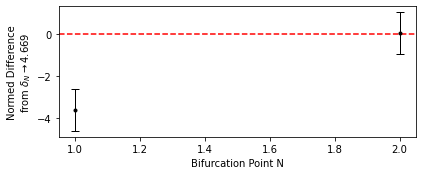

In [9]:
# Same with error propagation
feig = []
feig_error_array = []
Rv_error_assumed = 0.005 # in %error
for i in range(len(b) - 1):
    if i == 0:
        feig.append(b[i]/abs(b[i] - b[i+1]))
        # propagate uncertainty
        num_error = Rv_error_assumed
        denom_error = Rv_error_assumed*np.sqrt(b[i]**2+b[i+1]**2)
        feig_error = (b[i]/abs(b[i] - b[i+1]))*(np.sqrt(((num_error)/b[i])**2+(denom_error/(b[i] - b[i+1]))**2))
        feig_error_array.append(feig_error)
    else:
        feig.append((b[i] - b[i-1])/abs(b[i] - b[i+1]))
        num_error = Rv_error_assumed*np.sqrt(b[i]**2+b[i-1]**2)
        denom_error = Rv_error_assumed*np.sqrt(b[i]**2+b[i+1]**2)
        feig_error = ((b[i] - b[i-1])/abs(b[i] - b[i+1]))*(np.sqrt(((num_error)/(b[i] - b[i-1]))**2+(denom_error/(b[i] - b[i+1]))**2))
        feig_error_array.append(feig_error)

feig = np.array(feig)
feig_error_array = np.array(feig_error_array)
print(feig)
print(feig_error_array)
dif_feig = abs(feig - 4.669)

plt.errorbar([1,2],feig,fmt = "k.",yerr = feig_error_array,capsize=4,elinewidth=1,label = r"Fast $\tau$ Data")
plt.axhline(4.669201609102990671853203820466,linestyle = "dashed",color = "Red",label = r"$\delta_{N} \rightarrow 4.669...$")
plt.title("Experimental Measured Feigenbaum Constant")
plt.ylabel("$\delta_{N}$")
plt.xlabel('Bifurcation Point N')
plt.legend()
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-experimentalFirstFeigenbaum.png",dpi = 600)

plt.show()


plt.figure(figsize = (6.4, 2.4))
dif_feig = feig - 4.669
plt.errorbar([1,2],dif_feig/feig_error_array,fmt="k.",yerr = 1,capsize=4,elinewidth=1)
plt.axhline(0,linestyle = "dashed",color = "Red")
plt.xlabel('Bifurcation Point N')
plt.ylabel("Normed Difference\n"+r"from $\delta_{N} \rightarrow 4.669$")
plt.show()

# Second Feigenbaum Constant

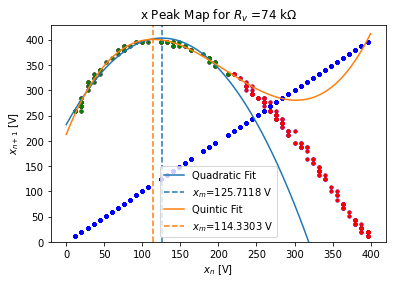

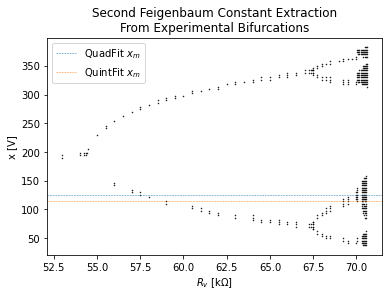

In [11]:
filename = "/work/Data_experimental/Fast_sweep/Rv_74.txt"
Rv_val = filename.split("_")[-1]
Rv_val = Rv_val.split(".")[0]
t, negative_x_prime, x = np.genfromtxt(filename, skip_header = 12, delimiter = ',', unpack = True)
x *= 1000
peaks,_ = local_max(x,N=90)
filteredPeaks = np.array([])
one_to_onePeaks = np.array([])
thresh = 0.01


for idx,diff in zip(range(len(peaks)-1),np.diff(peaks)):
    if np.abs(diff) >= thresh:
        filteredPeaks = np.append(filteredPeaks,peaks[idx])
    else:
        one_to_onePeaks = np.append(one_to_onePeaks,peaks[idx])

# All peaks2
x_n_array = peaks[:-1]
x_nplus_array = peaks[1:]
#plt.plot(x_n_array,x_nplus_array,"k.");

# Only peaks that stay the same amplitude within noise threshold
x_n_array = one_to_onePeaks[:-1]
x_nplus_array = one_to_onePeaks[1:]
plt.plot(x_n_array,x_nplus_array,"b.");

# Only peaks that are different by the noise threshold or more
x_n_array = filteredPeaks[:-1]
x_nplus_array = filteredPeaks[1:]
plt.plot(x_n_array,x_nplus_array,"r.",alpha=0.9);


def quadModel(x,a,b,c):
    return a*x**2 + b*x+c
def quadVertexFinder(a,b,c):
    """y' = 2ax + b = 0"""
    return -b/(2*a)
def quintModel(x,a,b,c,d):
    return a*x**3 + b*x**2+c*x+d

yminVal = 0*1000
xmaxVal = 0.22*1000
fit_y = x_nplus_array[np.logical_and(x_nplus_array > yminVal,x_n_array < xmaxVal)]
fit_x = x_n_array[np.logical_and(x_nplus_array > yminVal,x_n_array < xmaxVal)]
plt.plot(fit_x,fit_y,"g.")

# Fit quadratic
pOpt, pCov = curve_fit(quadModel, fit_x,fit_y, p0 = [-0.2,0.05, 0.05])
quadFitVertex = quadVertexFinder(pOpt[0],pOpt[1],pOpt[2])
# Fit Quintic
pOptN, pCovN = curve_fit(quintModel, fit_x,fit_y, p0 = [-0.2,0.05, 0.05,0.05])
#print(pOpt)

# Get fitted lines
x_fitted = np.linspace(0,0.4*1000,50000)
y_fitted = quadModel(x_fitted,pOpt[0],pOpt[1],pOpt[2])
y_fittedN = quintModel(x_fitted,pOptN[0],pOptN[1],pOptN[2],pOptN[3])
quintFitVertex_amp, quintFitVertex_idx = local_max(y_fittedN,N=20)
quintFitVertex = x_fitted[quintFitVertex_idx][0]

# plot
plt.plot(x_fitted,y_fitted,color = "C0",label = "Quadratic Fit");
plt.axvline(quadFitVertex,color = "C0",linestyle = "dashed",label =r"$x_m$="+str(np.around(quadFitVertex,4)) + " V");
plt.plot(x_fitted,y_fittedN,color = "C1",label = "Quintic Fit");
plt.axvline(quintFitVertex,color = "C1",linestyle = "dashed",label =r"$x_m$="+str(np.around(quintFitVertex,4)) + " V");
plt.title(r"x Peak Map for $R_v$ =" + Rv_val + r" k$\Omega$");
plt.ylabel(r"$x_{n+1}$ [V]");
plt.xlabel(r"$x_{n}$ [V]");
plt.legend();
plt.ylim(0,430);
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-experimentalPeakMap.png",dpi = 600)
plt.show();

oneLegendPoint = True
for Rv, bif in zip(Rv_arr, bifurcation):
    if Rv > 52 and Rv < 71:
        plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 1);
plt.axhline(quadFitVertex,color = "C0",label = r"QuadFit $x_m$",linewidth = 0.5,linestyle = "dashed");
plt.axhline(quintFitVertex,color = "C1",label = r"QuintFit $x_m$",linewidth = 0.5,linestyle = "dashed");

plt.title("Second Feigenbaum Constant Extraction\nFrom Experimental Bifurcations");
plt.ylabel("x [V]");
plt.xlabel(r"$R_v$ [k$\Omega$]");
plt.legend()
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-experimentalSecondFeig.png",dpi = 600)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>